# 2019 FordGoBike Data Exploration and Visualiztion
## by Chase Eby

## Preliminary Wrangling

> Bay Wheels a subsidiary of Lift(known for its ride share platform), Is a regional public bicycle sharing system in California's SanFrancisco Bay area(https://en.wikipedia.org/wiki/Bay_Wheels). The dataset includes anonoymized data from the month of march 2018.

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [7]:
# read csv in
df = pd.read_csv('201903-fordgobike-tripdata.csv')
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,53588,2019-03-31 20:59:21.8780,2019-04-01 11:52:30.2000,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,6803,Subscriber,No
1,74305,2019-03-31 13:56:46.0050,2019-04-01 10:35:11.4540,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,6415,Subscriber,No
2,79789,2019-03-31 11:48:34.2010,2019-04-01 09:58:23.8240,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,345.0,Hubbell St at 16th St,37.766483,-122.398279,2317,Customer,No
3,59315,2019-03-31 16:48:54.3740,2019-04-01 09:17:30.1540,92.0,Mission Bay Kids Park,37.772301,-122.393028,49.0,S Park St at 3rd St,37.780760,-122.394989,6631,Customer,No
4,47886,2019-03-31 19:54:24.1480,2019-04-01 09:12:30.8170,339.0,Jackson St at 11th St,37.800002,-122.266438,18.0,Telegraph Ave at Alcatraz Ave,37.850222,-122.260172,5241,Subscriber,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256294,451,2019-03-01 00:06:16.6170,2019-03-01 00:13:47.9220,78.0,Folsom St at 9th St,37.773717,-122.411647,136.0,23rd St at San Bruno Ave,37.754436,-122.404364,5410,Subscriber,No
256295,390,2019-03-01 00:05:19.7830,2019-03-01 00:11:50.7710,75.0,Market St at Franklin St,37.773793,-122.421239,78.0,Folsom St at 9th St,37.773717,-122.411647,6286,Subscriber,Yes
256296,231,2019-03-01 00:04:06.7990,2019-03-01 00:07:58.3140,317.0,San Salvador St at 9th St,37.333955,-121.877349,310.0,San Fernando St at 4th St,37.335885,-121.885660,6198,Subscriber,Yes
256297,257,2019-03-01 00:00:20.6750,2019-03-01 00:04:38.0380,235.0,Union St at 10th St,37.807239,-122.289370,160.0,West Oakland BART Station,37.805318,-122.294837,5096,Subscriber,Yes


In [8]:
# lets Explore the dataset shape
df.shape

(256299, 14)

In [9]:
# Looking at the datatypes of the dataset- looking for potential issues needing cleaning or tidying
df.dtypes


duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
dtype: object

In [10]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,53588,2019-03-31 20:59:21.8780,2019-04-01 11:52:30.2000,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,6803,Subscriber,No
1,74305,2019-03-31 13:56:46.0050,2019-04-01 10:35:11.4540,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,6415,Subscriber,No
2,79789,2019-03-31 11:48:34.2010,2019-04-01 09:58:23.8240,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,345.0,Hubbell St at 16th St,37.766483,-122.398279,2317,Customer,No
3,59315,2019-03-31 16:48:54.3740,2019-04-01 09:17:30.1540,92.0,Mission Bay Kids Park,37.772301,-122.393028,49.0,S Park St at 3rd St,37.780760,-122.394989,6631,Customer,No
4,47886,2019-03-31 19:54:24.1480,2019-04-01 09:12:30.8170,339.0,Jackson St at 11th St,37.800002,-122.266438,18.0,Telegraph Ave at Alcatraz Ave,37.850222,-122.260172,5241,Subscriber,No
5,67439,2019-03-31 14:07:39.7160,2019-04-01 08:51:39.0340,195.0,Bay Pl at Vernon St,37.812314,-122.260779,212.0,Mosswood Park,37.824893,-122.260437,5118,Customer,No
6,77996,2019-03-31 11:04:34.2090,2019-04-01 08:44:30.7300,96.0,Dolores St at 15th St,37.766210,-122.426614,134.0,Valencia St at 24th St,37.752428,-122.420628,2630,Customer,No
7,51522,2019-03-31 18:20:44.5900,2019-04-01 08:39:26.9230,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,817,Customer,No
8,47140,2019-03-31 18:37:04.2230,2019-04-01 07:42:44.5640,381.0,20th St at Dolores St,37.758238,-122.426094,223.0,16th St Mission BART Station 2,37.764765,-122.420091,4852,Customer,No
9,58462,2019-03-31 15:26:49.9150,2019-04-01 07:41:12.6750,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,5826,Subscriber,Yes


In [11]:
df.describe()


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,256299.000000,256078.000000,256299.000000,256299.000000,256078.000000,256299.000000,256299.000000,256299.000000
mean,807.873831,141.352424,37.771769,-122.356164,140.011317,37.771933,-122.355815,4916.572531
std,2056.305336,115.408300,0.097027,0.114907,115.386716,0.096979,0.114620,1687.339951
min,61.000000,3.000000,37.315158,-122.453704,3.000000,37.315158,-122.453704,11.000000
25%,338.000000,47.000000,37.770083,-122.415204,44.000000,37.770407,-122.413004,4525.000000
50%,542.000000,104.000000,37.780787,-122.398870,102.000000,37.781010,-122.398525,5369.000000
75%,854.000000,240.000000,37.797280,-122.293528,239.000000,37.797320,-122.293528,6127.000000
max,85676.000000,407.000000,37.880222,-121.874119,407.000000,37.880222,-121.874119,7082.000000


In [12]:
df.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           221
start_station_name         221
start_station_latitude       0
start_station_longitude      0
end_station_id             221
end_station_name           221
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
bike_share_for_all_trip      0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.user_type.value_counts()

Subscriber    219323
Customer       36976
Name: user_type, dtype: int64

In [15]:
df.bike_share_for_all_trip.value_counts()

No     233962
Yes     22337
Name: bike_share_for_all_trip, dtype: int64

## Cleaning Data
**This Dataset is fairly clean we dont have to do much to it.  There are a few things we can do to clean it up further and make it easier to analyze**
* Both start_time and end_time are str(objects) we may want to convert them to datetimes
* Both bike_id and start_station_id and end_station_id should be converted to strings(objects)
* user_type and bike_share_for_all_trip should be categories

In [16]:
# Make a copy of the dataframe
# fix issues with dtypes in the dataset
df_clean = df.copy()

# convert start_time and end_time to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

# convert bike_id and start_station_id and end_station_id to strings
df_clean['bike_id'] = df_clean['bike_id'].astype('str')
df_clean['start_station_id'] = df_clean['start_station_id'].astype('str')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('str')

# convert user_type and bike_share_for_all_trip should be categories
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype('category')

# make a new duration_minutes column from duration_sec
df_clean['duration_min'] = df_clean['duration_sec']/60

# Lets also split the start_time(dates and times) into their own columns to help visualize which days recieved more usage of bikes
df_clean['start_day_month'] = df_clean.start_time.dt.strftime('%Y-%m-%d')

df_clean['start_time_hour'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_day_week'] = df_clean.start_time.dt.strftime('%A')




In [17]:
# look at clean dataset
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_min,start_day_month,start_time_hour,start_day_week
0,53588,2019-03-31 20:59:21.878,2019-04-01 11:52:30.200,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,6803,Subscriber,No,893.133333,2019-03-31,20,Sunday
1,74305,2019-03-31 13:56:46.005,2019-04-01 10:35:11.454,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,6415,Subscriber,No,1238.416667,2019-03-31,13,Sunday
2,79789,2019-03-31 11:48:34.201,2019-04-01 09:58:23.824,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,345.0,Hubbell St at 16th St,37.766483,-122.398279,2317,Customer,No,1329.816667,2019-03-31,11,Sunday
3,59315,2019-03-31 16:48:54.374,2019-04-01 09:17:30.154,92.0,Mission Bay Kids Park,37.772301,-122.393028,49.0,S Park St at 3rd St,37.780760,-122.394989,6631,Customer,No,988.583333,2019-03-31,16,Sunday
4,47886,2019-03-31 19:54:24.148,2019-04-01 09:12:30.817,339.0,Jackson St at 11th St,37.800002,-122.266438,18.0,Telegraph Ave at Alcatraz Ave,37.850222,-122.260172,5241,Subscriber,No,798.100000,2019-03-31,19,Sunday


### What is the structure of your dataset?

> **The original dataset contains 256299 observations with 14 variables.  We can put these variables into a few categories.**

**Duration of Trip**
* duration_sec
* start_time
* end_time

**Location Info**
* start_station_name
* start_station_id	
* start_station_latitude
* start_station_longitude
* end_station_name
* end_station_id
* end_station_latitude	
* end_station_longitude

**User Info**
* user_type

**Trip Info**
* bike_share_for_all_trip
* bike_id


### What is/are the main feature(s) of interest in your dataset?

> I want to explore if specific bikes recieve more usage than other bikes.  I also want to explore which days of the week recieve the most usage aswell as the time of day that they are used. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The user_type and bike_id variable will help me look into which bikes are most used and the types of users that are using those bikes.  I split the Start_date in order to make it easier to see which days of the month and week recieved the most usage.  Also what time of day recieves the most usage.


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

**When making our plots we want to make sure people with visual imparements can decifer the plots**

In [18]:
# Make plot sizes larger
plt.rcParams['figure.figsize'] = 8, 6

# Use Colorblind for our pallet(Reduce the amount of different colors for our plots)
colorblind = sns.color_palette('colorblind')[0]

### 1. What types of users are riding bikes?  (Subsribers or regular customers)

Text(0, 0.5, 'Count of Rides')

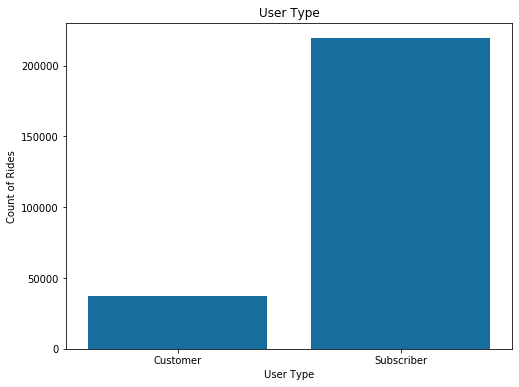

In [19]:
# lets look at user_type to see the distrobution of subsribers to non subscribers
sns.countplot(data=df_clean, x='user_type', color = colorblind).set_title("User Type")
plt.xlabel('User Type');
plt.ylabel('Count of Rides')

**From the graph above we can see that the vast majority of rides are with subscribers**

### 2. Which days of the week are users riding?

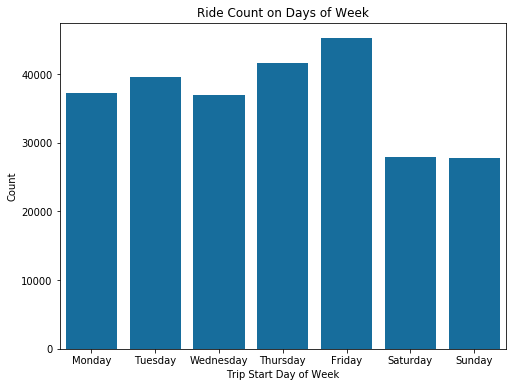

In [20]:
# Label the graph with each day of the week
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_as_category = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)
df_clean['start_day_week'] = df_clean['start_day_week'].astype(weekday_as_category)

# Plot the weekdays
sns.countplot(data=df_clean, x='start_day_week', color=colorblind).set_title('Ride Count on Days of Week');

plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');

**As the graph above shows the Bike Service gets more usage during the week.  We can look into this further by looking into which ours are the bikes being used.**

### 3. Which hours of the day are the bikes being used the most?

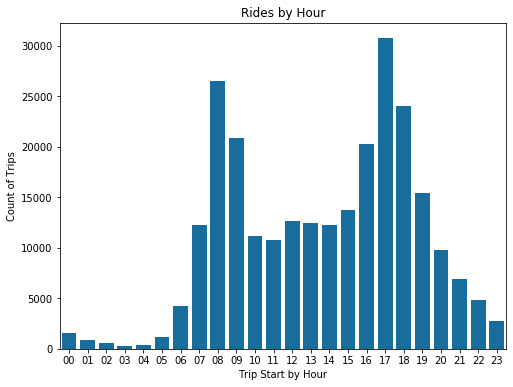

In [21]:
sns.countplot(data=df_clean, x='start_time_hour', color=colorblind).set_title('Rides by Hour');
plt.xlabel('Trip Start by Hour');
plt.ylabel('Count of Trips');

**We can see that most of the rides start during two peak hours (8 AM and 5 PM), we might be able to make the assumption that people are using the bikes to go to and from work.**

### 4. lets look at ride duration next.  What is the ditribution of the ride duration?

Text(0.5, 1.0, 'Distribution of Ride Length')

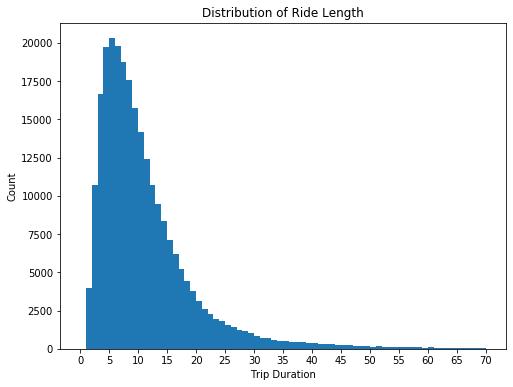

In [22]:
bins = np.arange(0, 71, 1)
ticks = np.arange(0, 71, 5)
plt.hist(data=df_clean , x='duration_min', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration');
plt.ylabel('Count')

plt.title('Distribution of Ride Length')

**As the graph above shows.  The average ride length is between 5 and 10 minutes.  There are a few rides that are longer than expeted.  I graphed to 70 minutes meaning there were a few extreemly long usages of the bike share platform.**

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The main observation that I noticed was that the majority of rides were happeing during the week at 8 AM and 5 PM.  This shows that the Bike Share platform is being used by people getting to and from work. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> One of the unusual points that interested me was with the trip duration.  Some users were taking longer trips than the the average user.  If we could calculate the distance of those outliers we could possibly find some interesting observations

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### 5. Lets look at the average time spent on bikes vs Subscribers and Non Subscribers

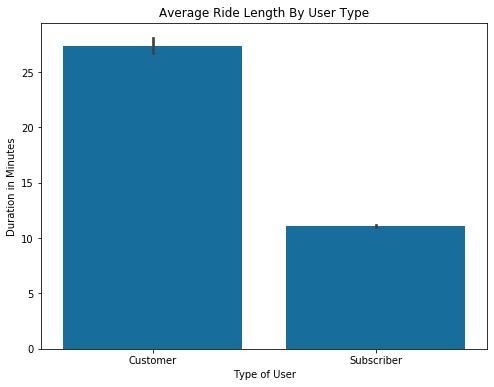

In [23]:
# Compare Average Time on Bike vs Customer Type
sns.barplot(data=df_clean, x='user_type', y='duration_min', color=colorblind).set_title('Average Ride Length By User Type');
plt.ylabel('Duration in Minutes');
plt.xlabel('Type of User');

**As we can see from the graph above,  non-subscribers ride over twice as long as subsribers do. This is interesting because the subribers are the repeat customers so it makes sense that they would have more but shorter rides.  Conversly a one time customer may need a bike for a while but only needs it a few times a year.**

### 6. Lets look at what times of the day do customers and subsribers use the service.

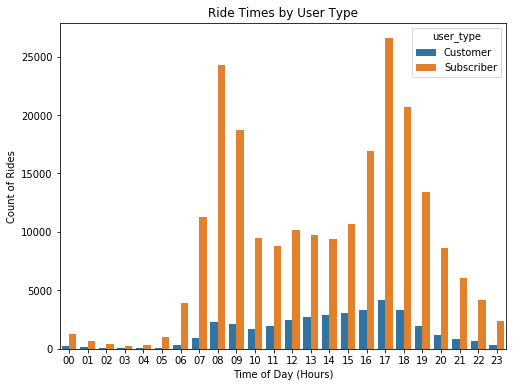

In [24]:
# Plot The Start Times by which type of user is using them.
sns.countplot(data=df_clean, x='start_time_hour', hue='user_type').set_title('Ride Times by User Type');
plt.xlabel('Time of Day (Hours)');
plt.ylabel('Count of Rides');

**As the graph shows above we can see that subscribers use the service at two time periods,  8 AM and 5 PM.  While non subscribers use the service at a fairly constant rate through out the day but having its peak at 5 PM.  This shows us again that Subsribers and customers have different use cases**

### 7. Which days of the week are each user group using the service?

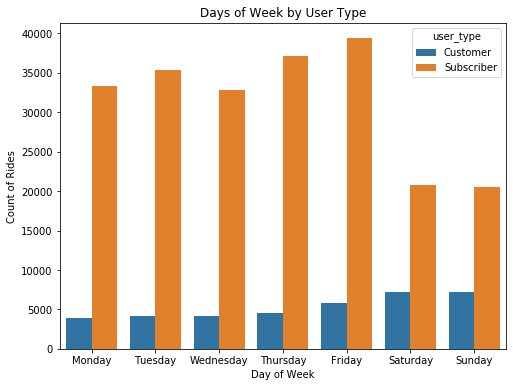

In [25]:
# Plot The Start Times by which type of user is using them.
sns.countplot(data=df_clean, x='start_day_week', hue='user_type').set_title('Days of Week by User Type');
plt.xlabel('Day of Week');
plt.ylabel('Count of Rides');

**Again we have some interesting findings between the Subscriber group and Customer Group.  We can see that subsribers use the service more during the work week(Monday-Friday) and the customer group uses it more during the weekend(Friday, Saturday and Sunday).  This could represent that subsribers use the bikes to get to work while the customer group may use the bikes for more recreational purposes**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationship between the customer group and subriber groups to the days and the hours of the week were very interesting.  we they seem to have opposite use cases for the bikes.  When the subsribers arent using the bikes as much customers are using them more.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One of the interesting findings from exploring the User type and Ride Times shows that while Subscribers of the platform have 2 distint peaks of usage being 8 AM and 5 PM.  

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### 8. Lets look at how long each user_type is using the bike for each day of the week.  

Text(0, 0.5, 'Average Ride Length (Minutes)')

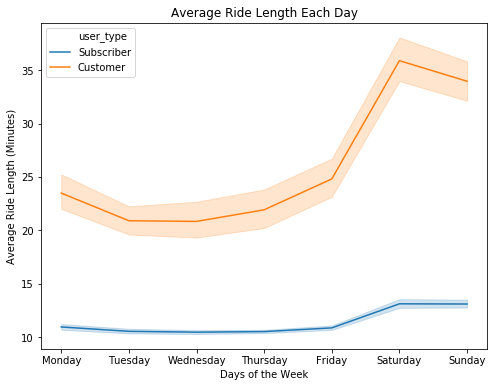

In [26]:
sns.lineplot(data=df_clean, x = 'start_day_week', y = 'duration_min', hue='user_type').set_title('Average Ride Length Each Day')
plt.xlabel('Days of the Week')
plt.ylabel('Average Ride Length (Minutes)')

**From the plot above we can see that the average ride length for each user_type increases on the weekend.  We can also see from this graph that Subsribers have a much smaller standard deviation than that of the customer group. Indicating that the rides that subscribers are taking are easily repeatable, such a ride to work.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationships between the day of week and the average ride length was higher in both groups.  This shows that both user_type's increase their ride length during the weekend. 

### Were there any interesting or surprising interactions between features?

> The interesting interaction that was surprising was how much smaller of a standard deviation there is in the subsriber group.  it seems that the average time on the bike is very repeatable for a subsriber.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!